In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import boston_housing
from keras import models, regularizers, optimizers, losses
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten, Input
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [71]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.1)

mean = x_train.mean()
std = x_train.std()

x_train -= mean
x_train /= std

x_test -= mean
x_test /= std

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

In [72]:
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

(409, 13)
(409,)
(46, 13)
(46,)
(51, 13)
(51,)


In [73]:
print("X ", x_train)
print("y: ", y_train)

X  [[-0.32608608 -0.48236232 -0.35718697 ... -0.34266386  2.26250501
  -0.26112698]
 [-0.48206238 -0.33713125 -0.4433574  ... -0.36617746  2.24224181
  -0.41714665]
 [-0.48199081 -0.48236232 -0.38609486 ... -0.37171007  2.23449616
  -0.43125481]
 ...
 [-0.43115875 -0.48236232 -0.35718697 ... -0.34266386  1.69361414
  -0.29978611]
 [-0.48129418 -0.30946818 -0.44688444 ... -0.34612174  2.21948895
  -0.43492017]
 [-0.47876211 -0.48236232 -0.43948457 ... -0.362028    2.20406679
  -0.41638592]]
y:  [ 7.4 20.5 27.1 17.8 18.3  7.5 15.  11.3 17.1 18.7  7.  25.  13.1 12.1
 33.1 28.6 28.2 43.5 10.2 20.2 20.5 21.4 20.6 19.6 20.1 29.4 31.5 24.8
 10.8 22.9 32.  36.5 21.7 16.1 30.8 36.2 13.8 29.6 22.8 19.3 20.8  8.5
 30.7 37.6 33.2 23.6 16.5 17.2 21.4 13.5 16.7 45.4 48.3 43.8 23.9 24.4
 50.  21.2 19.6 22.2 19.7 19.6 23.1 33.4  6.3 24.3 15.6 19.3 25.  22.
 29.1  7.2 18.8 50.  20.1 23.9 33.3 30.1 14.1 35.4 37.  23.7 19.3 37.9
 30.5 20.4 29.8 17.5 18.5 23.8 50.  27.9 28.  36.4 24.4 37.2 25.3  8.4
 19.2

In [74]:
model = models.Sequential()
model.add(Input((x_train.shape[1],)))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
epochs = 500
batch_size = 32
loss = losses.mean_squared_error
opt = optimizers.RMSprop(0.01)

model.compile(loss=loss, optimizer=opt, metrics=['mae'])

lr_reduction = ReduceLROnPlateau(
    monitor= "val_loss",
    factor=0.5,
    patience=5,
    verbose=1,
    min_lr=0.001
)

In [76]:
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=1,
                    callbacks=[lr_reduction])

Epoch 1/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 178.9481 - mae: 9.9433 - val_loss: 36.9466 - val_mae: 4.4802 - learning_rate: 0.0100
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 75.6113 - mae: 6.0955 - val_loss: 20.7602 - val_mae: 3.3042 - learning_rate: 0.0100
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 76.2938 - mae: 6.1678 - val_loss: 20.4297 - val_mae: 3.3152 - learning_rate: 0.0100
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 66.0657 - mae: 5.5962 - val_loss: 22.8400 - val_mae: 3.8131 - learning_rate: 0.0100
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 71.7828 - mae: 6.2038 - val_loss: 25.7608 - val_mae: 4.1653 - learning_rate: 0.0100
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 67.0942 - mae: 5.7907 - val_loss: 20.3516 - val_mae: 3.2863 - learning_rate: 0.0100
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 71.3498 - mae: 6.0530 - val_loss: 23.2052 - val_mae: 3.2781 - learning_rate

In [79]:
score = model.evaluate(x_test, y_test, verbose=0)
y_pred = model.predict(x_test)
print('Validation loss:', score[0])
print('Validation mae:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Validation loss: 39.29970169067383
Validation mae: 4.269443035125732


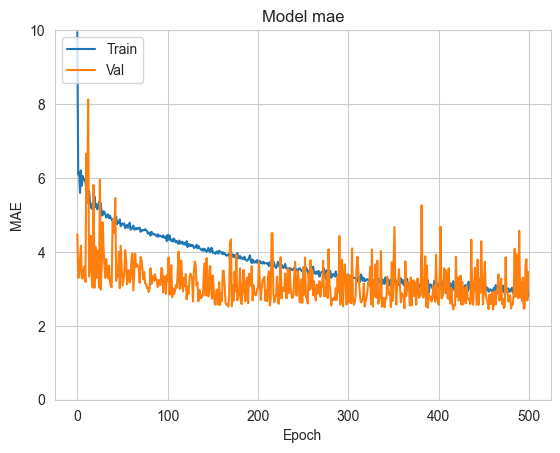

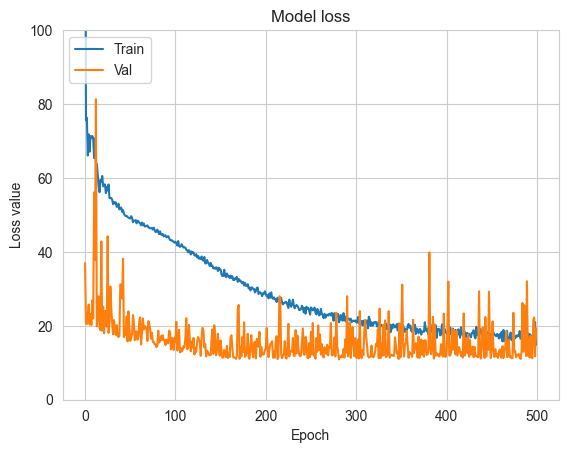

In [80]:
mae = history.history['mae']
loss = history.history['loss']

val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(mae)
plt.plot(val_mae)
plt.title('Model mae')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim([0, 10])
plt.show()

plt.figure()
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim([0, 100])
plt.show()